**IMPORTING LIBRARIES:**

In [1]:
# importing all the required libraries use in the project.

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')


**RETRIEVING DATA:**




In [2]:
# loading the data from cvs file
# showing the first 5 rows from the data

df = pd.read_csv('train_loan_dataset.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# rows and columns of the dataset

df.shape

(614, 13)

In [4]:
# statistical visualization

df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
# data type of the features

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**DATA PREPARATION:**

In [6]:
# find missing values of each feature of the dataset

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# First we will the filling the missing values for numerical terms - By using mean

df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [8]:
# missing values of the dataset

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# THen we will the filling the missing values for categorical terms - By using mode operation (frequently occurring values)

df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

In [10]:
# Missing values in the dataset

df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
# Label encoding to convert string or object to numeric values

le = LabelEncoder()
df["Loan_Status"] = le.fit_transform(df["Loan_Status"])
df["Gender"] = le.fit_transform(df["Gender"])
df["Married"] = le.fit_transform(df["Married"])
df["Education"] = le.fit_transform(df["Education"])
df["Self_Employed"] = le.fit_transform(df["Self_Employed"])
df["Property_Area"] = le.fit_transform(df["Property_Area"])
df = df.replace(to_replace='3+',value=4)

In [12]:
# Dataset

df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 62.5+ KB


In [14]:
# Creating new feature to find more accurate predictions

df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [15]:
# Dataset

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,5849.0
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,6091.0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,3000.0
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4941.0
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,6000.0


**EXPLORATORY DATA ANALYSIS:**

<Axes: xlabel='Education', ylabel='count'>

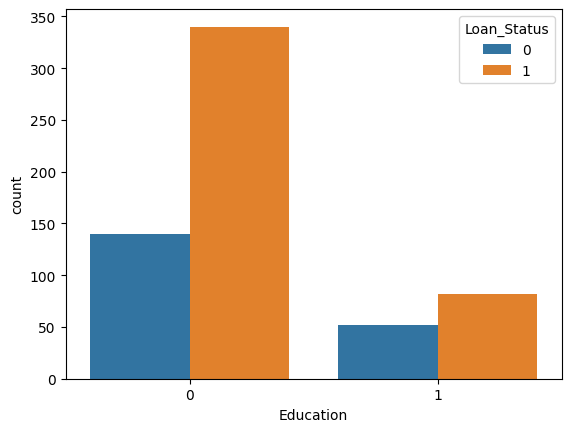

In [16]:
# visualizing the different features of the dataset

sns.countplot(x='Education',hue='Loan_Status',data=df)

<Axes: xlabel='Married', ylabel='count'>

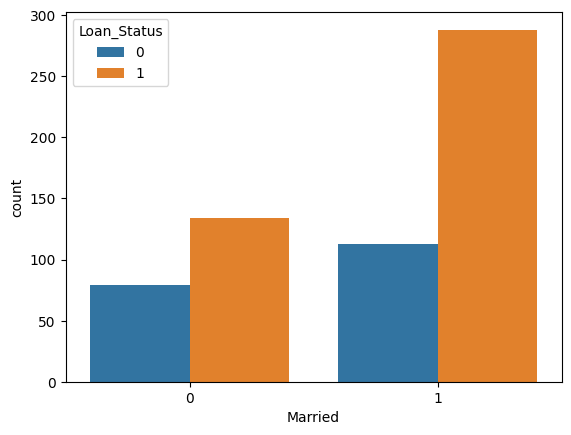

In [17]:
sns.countplot(x='Married',hue='Loan_Status',data=df)

<Axes: xlabel='Dependents', ylabel='count'>

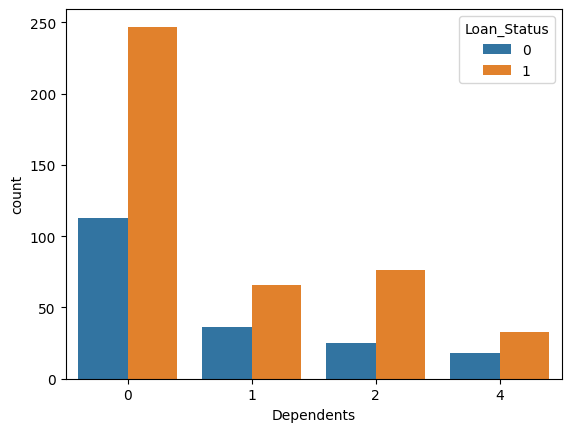

In [18]:
sns.countplot(x='Dependents',hue='Loan_Status',data=df)

<Axes: xlabel='Self_Employed', ylabel='count'>

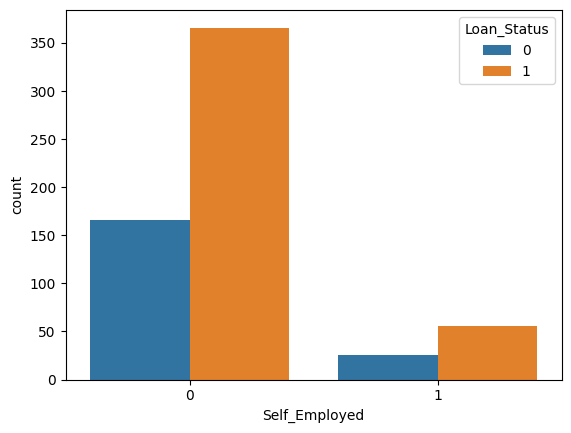

In [19]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

<Axes: xlabel='Loan_Status', ylabel='count'>

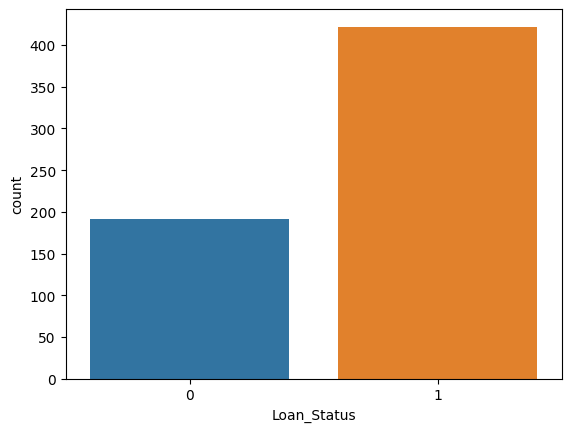

In [20]:
sns.countplot(x="Loan_Status",data=df)

<Axes: xlabel='LoanAmount', ylabel='Density'>

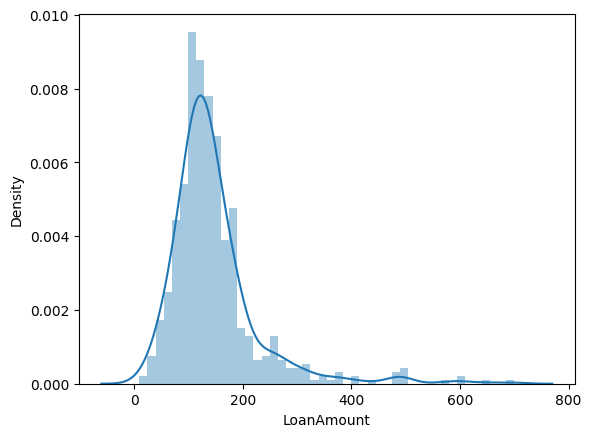

In [21]:
sns.distplot(df["LoanAmount"])

In [22]:
# Drop unnecessary columns to make processing fast

df = df.drop(columns=["Loan_ID","ApplicantIncome","CoapplicantIncome"], axis=1)


In [23]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1,0,0,0,0,146.412162,360.0,1.0,2,1,5849.0
1,1,1,1,0,0,128.000000,360.0,1.0,0,0,6091.0
2,1,1,0,0,1,66.000000,360.0,1.0,2,1,3000.0
3,1,1,0,1,0,120.000000,360.0,1.0,2,1,4941.0
4,1,0,0,0,0,141.000000,360.0,1.0,2,1,6000.0


**DATA MODELING:**

In [25]:
# Select the input and output variables

x = df.drop(columns=['LoanAmount','Loan_Status'], axis=1)
y = df['Loan_Status']

In [26]:
# Data modeling

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
model = LogisticRegression()
model.fit(x_train, y_train)
print("Accuracy is", model.score(x_test, y_test)*100)

Accuracy is 77.27272727272727


In [27]:
# predicting model

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Accuracy is", accuracy_score(y_test,y_pred)*100)

Accuracy is 77.27272727272727


In [28]:
# PCA to reduce dimensions

pca = PCA(0.95)
x_pca = pca.fit_transform(x)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.25, random_state=42)
model = LogisticRegression()
model.fit(x_train, y_train)
print("Accuracy is", model.score(x_test, y_test)*100)

Accuracy is 64.93506493506493


In [30]:
# predicting model

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Accuracy is", accuracy_score(y_test,y_pred)*100)

Accuracy is 64.93506493506493


In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
print("Accuracy is", model.score(x_test, y_test)*100)

Accuracy is 68.18181818181817


In [32]:
# predicting model

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Accuracy is", accuracy_score(y_test,y_pred)*100)

Accuracy is 66.23376623376623


**PRESENTATION AND AUTOMATION:**

In [33]:
# predicting model

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

cm = confusion_matrix(y_test,y_pred)

<Axes: >

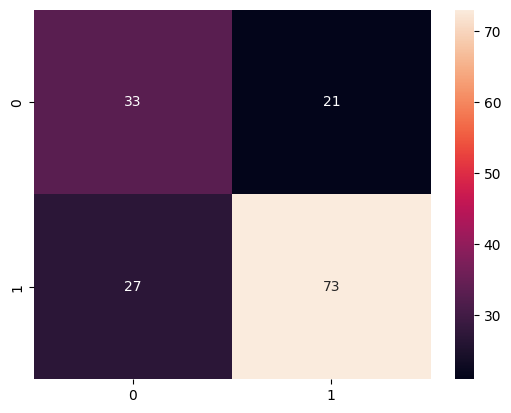

In [34]:
sns.heatmap(cm, annot=True)